In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
from dowker_homology import dowker_persistent_homology, plot_persistence
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# generate data
N = 2000
x = np.linspace(0, 2*np.pi, num=N, endpoint=False).reshape(N,1)
y = 20*x
coords = np.hstack((np.cos(x), np.sin(x), np.cos(y), np.sin(y)))

<IPython.core.display.Javascript object>


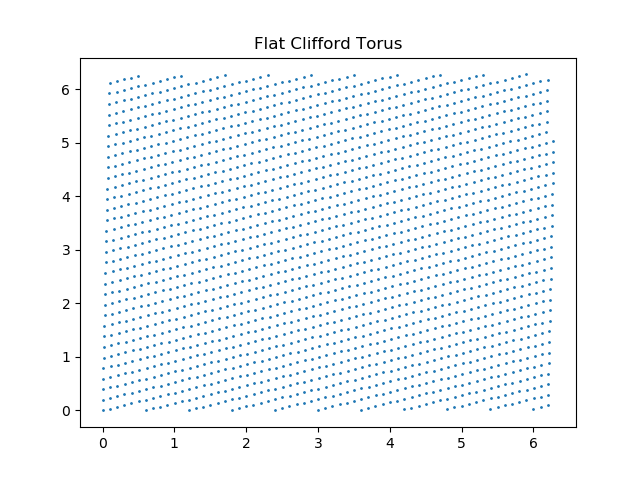

Text(0.5,1,'Flat Clifford Torus')

In [25]:
#plot flat torus
fig, ax = plt.subplots()
ax.plot(x,y % 2*np.pi, marker="o",
                linestyle="", ms=1)
ax.set_title('Flat Clifford Torus')

In [4]:
# choose parameters
n = len(coords)
interleaving = 3
dimension = 3

In [5]:
%%time 
homology_dowker, cover_radius_dowker, max_filtration_value_dowker = dowker_persistent_homology(
    coords, 
    n_samples=n, 
    interleaving=interleaving,
    dimension=dimension, 
    method="dowker",
    verbose=True)

Unreduced nerve has cardinality 2.66001666835e+14
Clique reduced nerve of cover has cardinality 10205879
Sparse nerve of cover has cardinality 346600
CPU times: user 12min 55s, sys: 8.18 s, total: 13min 4s
Wall time: 13min 4s


In [6]:
%%time 
homology_sheehy, cover_radius_sheehy, max_filtration_value_sheehy = dowker_persistent_homology(
    coords, 
    n_samples=n, 
    interleaving=interleaving,
    dimension=dimension, 
    method="sheehy",
    verbose=True)

Unreduced nerve has cardinality 2.66001666835e+14
Clique reduced nerve of cover has cardinality 21283558
Sparse nerve of cover has cardinality 352690
CPU times: user 27min 46s, sys: 17 s, total: 28min 3s
Wall time: 28min 3s


<IPython.core.display.Javascript object>


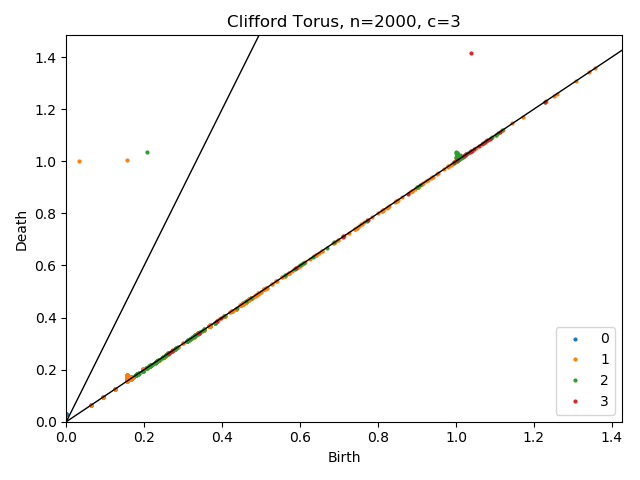

In [19]:
plot_dowker = plot_persistence(homology_dowker,
                               ticks=None, 
                               interleaving=interleaving,
                               cover_radius=cover_radius_dowker,
                               max_filtration_value=max_filtration_value_dowker,
                               title='Clifford Torus, n=2000, c=3',
                               s=10)

<IPython.core.display.Javascript object>


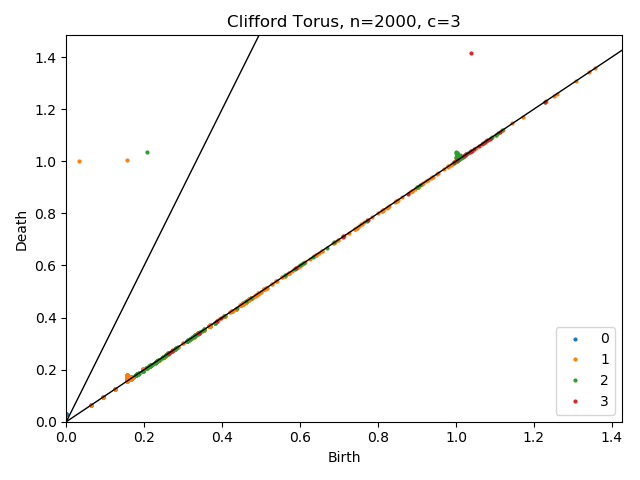

In [20]:
plot_sheehy = plot_persistence(homology_sheehy,
                               ticks=None, 
                               interleaving=interleaving,
                               cover_radius=cover_radius_sheehy,
                               max_filtration_value=max_filtration_value_sheehy,
                               title='Clifford Torus, n=2000, c=3',
                               s=10)